In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import pandas as pd

In [3]:
test_dir = 'breastcancerdataset/test'
img_width, img_height = 50, 50
batch_size = 32

In [4]:
model = load_model("breastcancer.h5")

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important to keep the order for analysis
)

Found 55506 images belonging to 2 classes.


Basic model evaluation

In [6]:
print("Evaluating model on test data...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Evaluating model on test data...


c:\Users\BALAMURALI KRISHNA A\OneDrive\Desktop\Smartbridge\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8251 - loss: 0.4086

Test Accuracy: 0.8365
Test Loss: 0.3827


Get Predictions

In [7]:
print("\nGenerating predictions...")
test_generator.reset()  # Reset generator to start from beginning
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = test_generator.classes


Generating predictions...
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step


Confusion Matrix


Generating confusion matrix...


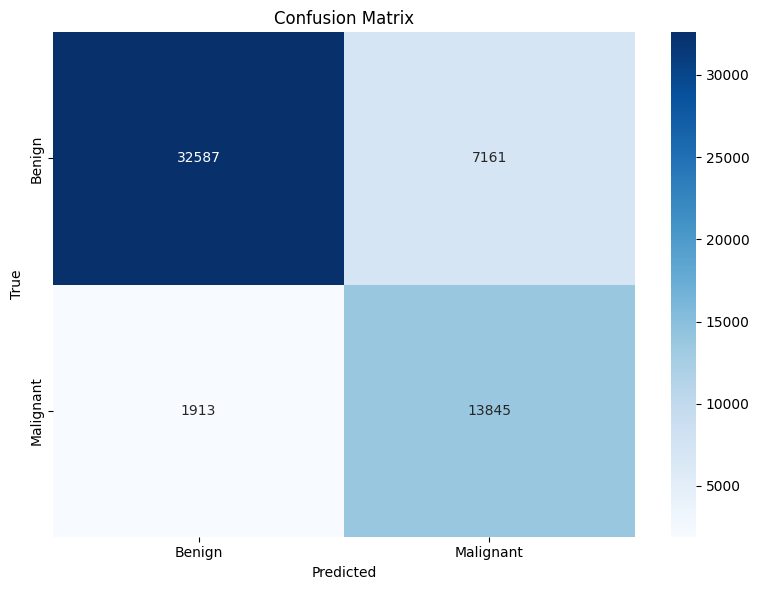

In [8]:
print("\nGenerating confusion matrix...")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

In [9]:
print("\nDetailed Classification Report:")
cr = classification_report(y_true, y_pred, 
                          target_names=['Benign', 'Malignant'],
                          output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
print(cr_df.round(3))


Detailed Classification Report:
              precision  recall  f1-score    support
Benign            0.945   0.820     0.878  39748.000
Malignant         0.659   0.879     0.753  15758.000
accuracy          0.837   0.837     0.837      0.837
macro avg         0.802   0.849     0.815  55506.000
weighted avg      0.864   0.837     0.842  55506.000


In [10]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print(f"\nAdditional Clinical Metrics:")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"Positive Predictive Value: {ppv:.4f}")
print(f"Negative Predictive Value: {npv:.4f}")


Additional Clinical Metrics:
Sensitivity (True Positive Rate): 0.8786
Specificity (True Negative Rate): 0.8198
Positive Predictive Value: 0.6591
Negative Predictive Value: 0.9446



Generating ROC curve...


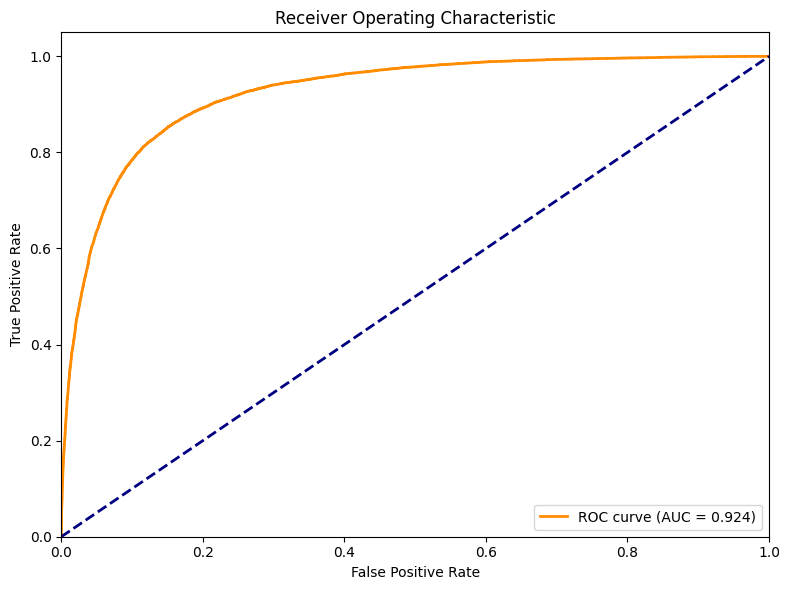

In [11]:
print("\nGenerating ROC curve...")
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()

In [12]:
print("\nVisualizing sample predictions...")


Visualizing sample predictions...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


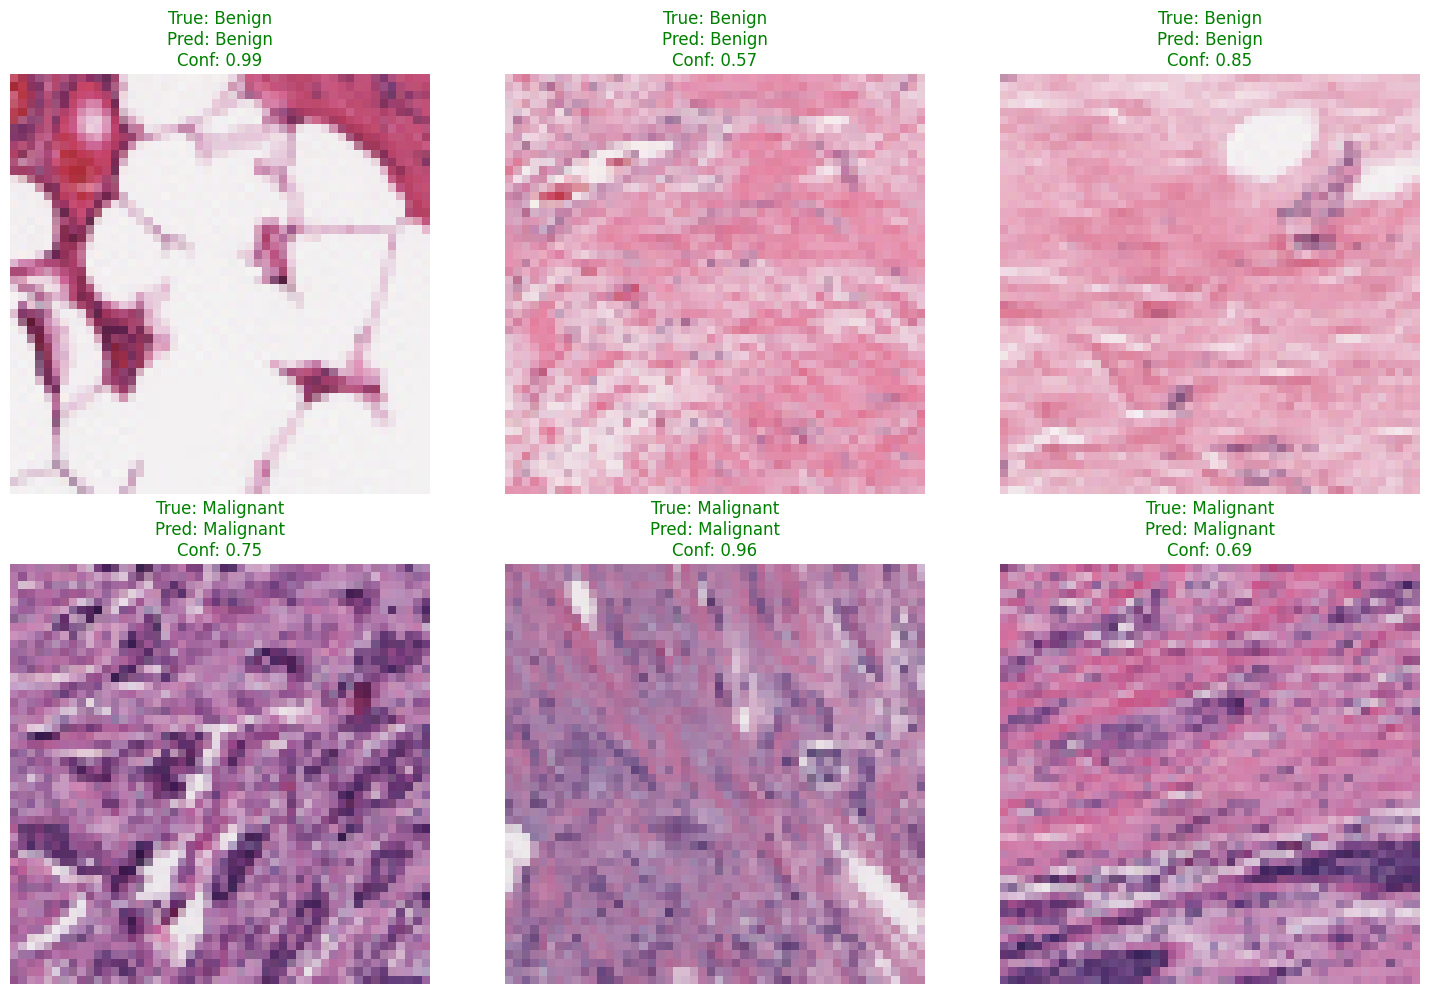


Analyzing misclassifications...
Number of misclassified images: 9074 out of 55506 total images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


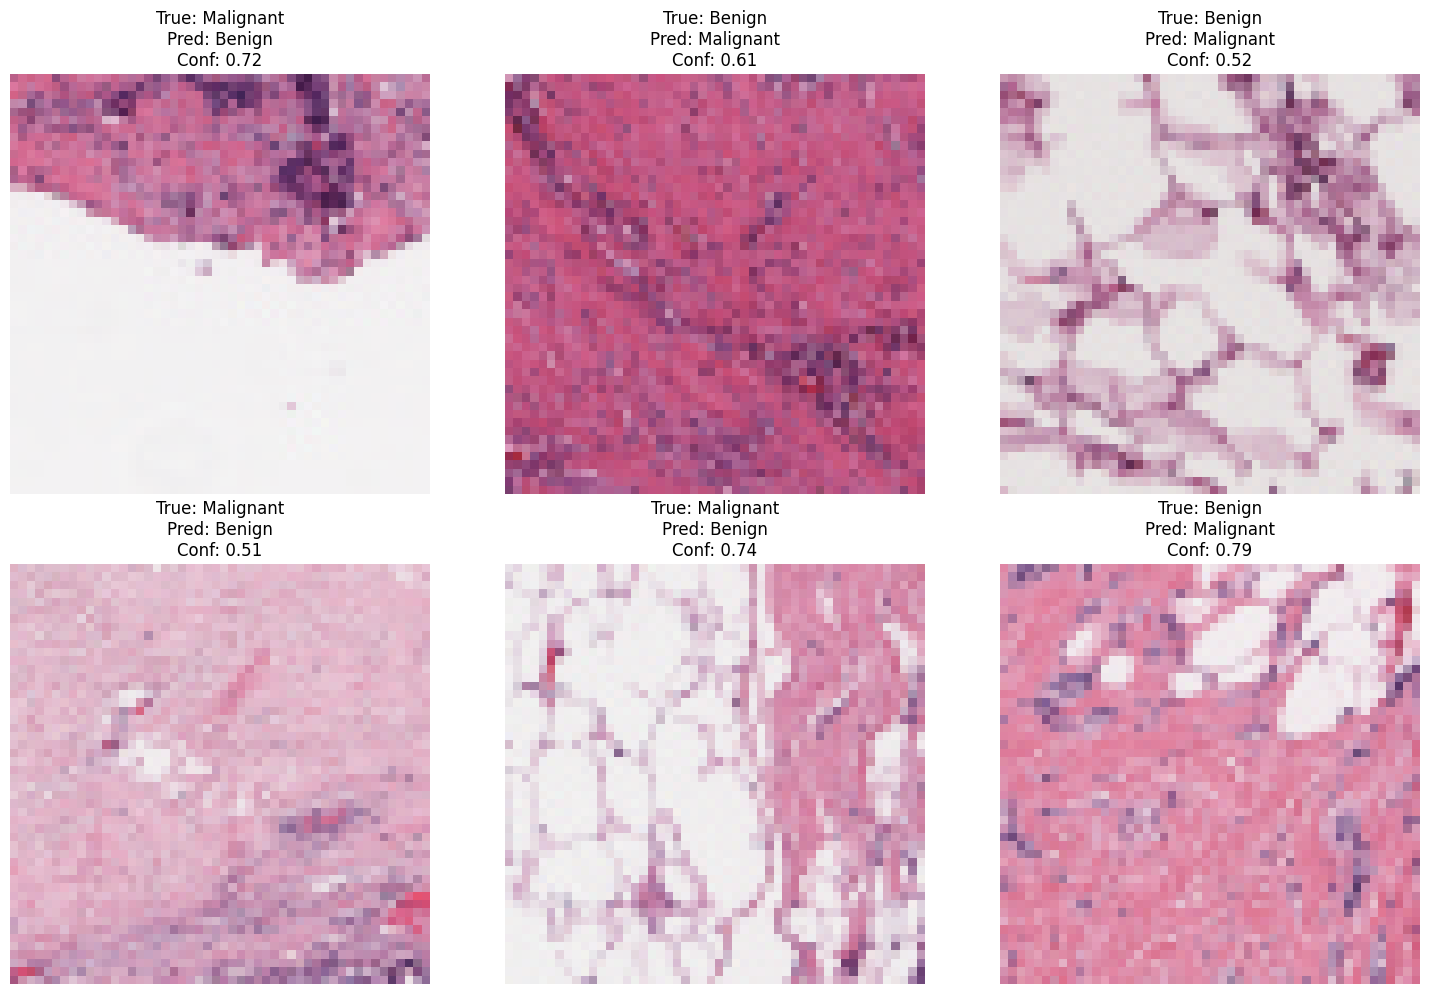


Performing threshold analysis...
   threshold  accuracy  sensitivity  specificity
0        0.1     0.552        0.990        0.379
1        0.2     0.672        0.971        0.554
2        0.3     0.751        0.947        0.674
3        0.4     0.803        0.916        0.758
4        0.5     0.837        0.879        0.820
5        0.6     0.857        0.833        0.866
6        0.7     0.869        0.771        0.908
7        0.8     0.865        0.673        0.941
8        0.9     0.838        0.498        0.972


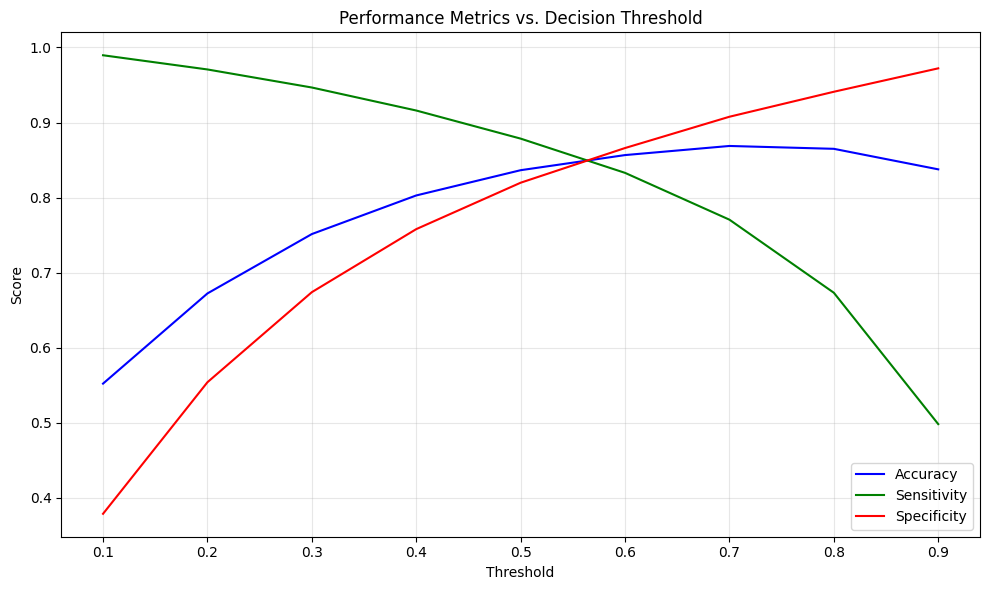


Testing complete!


In [ ]:
def load_and_predict(img_path):
    img = load_img(img_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)[0][0]
    predicted_class = "Malignant" if prediction > 0.5 else "Benign"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    return img, predicted_class, confidence

benign_dir = os.path.join(test_dir, 'benign')
malignant_dir = os.path.join(test_dir, 'malignant')

benign_samples = np.random.choice(os.listdir(benign_dir), 3, replace=False)
malignant_samples = np.random.choice(os.listdir(malignant_dir), 3, replace=False)
plt.figure(figsize=(15, 10))
sample_count = 1

for i, sample in enumerate(benign_samples):
    img_path = os.path.join(benign_dir, sample)
    img, pred_class, conf = load_and_predict(img_path)
    
    plt.subplot(2, 3, sample_count)
    plt.imshow(img)
    color = "green" if pred_class == "Benign" else "red"
    plt.title(f"True: Benign\nPred: {pred_class}\nConf: {conf:.2f}", color=color)
    plt.axis('off')
    sample_count += 1

for i, sample in enumerate(malignant_samples):
    img_path = os.path.join(malignant_dir, sample)
    img, pred_class, conf = load_and_predict(img_path)
    
    plt.subplot(2, 3, sample_count)
    plt.imshow(img)
    color = "green" if pred_class == "Malignant" else "red"
    plt.title(f"True: Malignant\nPred: {pred_class}\nConf: {conf:.2f}", color=color)
    plt.axis('off')
    sample_count += 1

plt.tight_layout()
plt.savefig('sample_predictions.png')
plt.show()

print("\nAnalyzing misclassifications...")
misclassified_indices = np.where(y_pred != y_true)[0]
print(f"Number of misclassified images: {len(misclassified_indices)} out of {len(y_true)} total images")

if len(misclassified_indices) > 0:
    filepaths = np.array(test_generator.filepaths)
    misclassified_files = filepaths[misclassified_indices]
    
    num_to_display = min(6, len(misclassified_indices))
    display_indices = np.random.choice(len(misclassified_indices), num_to_display, replace=False)
    
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(display_indices):
        file_path = misclassified_files[idx]
        img = load_img(file_path, target_size=(img_width, img_height))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        
        true_class_idx = y_true[misclassified_indices[idx]]
        pred_class_idx = y_pred[misclassified_indices[idx]]
        
        true_class = "Malignant" if true_class_idx == 1 else "Benign"
        pred_class = "Malignant" if pred_class_idx == 1 else "Benign"
        
        raw_pred = model.predict(img_array)[0][0]
        confidence = raw_pred if raw_pred > 0.5 else 1 - raw_pred
        
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('misclassifications.png')
    plt.show()

print("\nPerforming threshold analysis...")
thresholds_to_try = np.arange(0.1, 1.0, 0.1)
threshold_results = []

for threshold in thresholds_to_try:
    y_pred_at_threshold = (predictions > threshold).astype(int).flatten()
    accuracy = accuracy_score(y_true, y_pred_at_threshold)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_at_threshold).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    threshold_results.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity
    })

threshold_df = pd.DataFrame(threshold_results)
print(threshold_df.round(3))

plt.figure(figsize=(10, 6))
plt.plot(threshold_df['threshold'], threshold_df['accuracy'], 'b-', label='Accuracy')
plt.plot(threshold_df['threshold'], threshold_df['sensitivity'], 'g-', label='Sensitivity')
plt.plot(threshold_df['threshold'], threshold_df['specificity'], 'r-', label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Decision Threshold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('threshold_analysis.png')
plt.show()

print("\nTesting complete!")